In [1]:
!pip install unrar

In [2]:
! wget  https://www.dropbox.com/s/raw/qsilbkoobll6z1q/Abdelmoula%20et%20al.%20PNAS%202016_SpatialOmics_Cancer.rar

--2020-12-11 11:13:39--  https://www.dropbox.com/s/raw/qsilbkoobll6z1q/Abdelmoula%20et%20al.%20PNAS%202016_SpatialOmics_Cancer.rar
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601f:18::a27d:912
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7a6e63ef7a119ec57c5faa337f.dl.dropboxusercontent.com/cd/0/inline/BE1zCVd3BfCsCKhN8GtwUGOFiG5vDXr8orR3Sl19aeiawOnx-js9JoK0mnhrEBaQUWLGtXuaY8BFyTBwJGW1sLNOpS0kHcadwVLNh5sxi8ksTeT3YEKnHGOlxjDHXuZe2YA/file# [following]
--2020-12-11 11:13:39--  https://uc7a6e63ef7a119ec57c5faa337f.dl.dropboxusercontent.com/cd/0/inline/BE1zCVd3BfCsCKhN8GtwUGOFiG5vDXr8orR3Sl19aeiawOnx-js9JoK0mnhrEBaQUWLGtXuaY8BFyTBwJGW1sLNOpS0kHcadwVLNh5sxi8ksTeT3YEKnHGOlxjDHXuZe2YA/file
Resolving uc7a6e63ef7a119ec57c5faa337f.dl.dropboxusercontent.com (uc7a6e63ef7a119ec57c5faa337f.dl.dropboxusercontent.com)... 162.125.4.15, 2620:100:6019:15::a27d:40f
Connecting to

In [4]:
!unrar x /content/Abdelmoula_et_al_PNAS_2016_SpatialOmics_Cancer.rar


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/Abdelmoula_et_al_PNAS_2016_SpatialOmics_Cancer.rar

Creating    Abdelmoula et al. PNAS 2016 - MSI data                    OK
Extracting  Abdelmoula et al. PNAS 2016 - MSI data/breast_cancer_dataset.mat       6% 12% 19% 25% 32% 38% 41%  OK 
Extracting  Abdelmoula et al. PNAS 2016 - MSI data/gastric_cancer_dataset.mat      47% 53% 60% 66% 73% 79% 86% 92% 99%  OK 
Extracting  Abdelmoula et al. PNAS 2016 - MSI data/variables_description.txt      99%  OK 
All OK


## Gastric Cancer work  

### Start by Visualization of data

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io

In [6]:
g_data = scipy.io.loadmat('/content/Abdelmoula et al. PNAS 2016 - MSI data/gastric_cancer_dataset.mat')
g_data

{'HE_image': array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 'MSI_data_cube': array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
 

In [7]:
g_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'goodlist', 'x', 'y', 'z', 'peak_list', 'MSI_data_cube', 'HE_image', 'None', 'pixel_to_sample_ID', '__function_workspace__'])

In [19]:
pixels = g_data['goodlist']
print("Number/size of pixels in gc_data:", pixels.size)
print("shape of pixels in gc_data:", pixels.shape)

pixels_list = list(pixels)
ones = []

for i in range(0, len(pixels_list)):
    if (pixels_list[i] == 1):
        ones.append(i)

# for j in range(0, len(ones)):
#     print("Index of pixels with value of %d is %d" % (1, ones[j]))

Number/size of pixels in gc_data: 732279
shape of pixels in gc_data: (732279, 1)


# Explain MSI_data_cube
> ***MSI_data_cube Contains image of each protein data in gc_data.*** <br>
> ***MSI_data_cube shape contains x, y and z which are:*** <br>
    > * x: width of dataset in pixels
    > * y: height of dataset in pixels
    > * z: number of peaks (z-dimension of MSI_data_cube)

In [9]:
MSI = g_data['MSI_data_cube']
print("Number/size of MSI in gc_data:", MSI.size)
print("shape of MSI in gc_data:", MSI.shape)
print("Type of MSI is:", type(MSI))

Number/size of MSI in gc_data: 60046878
shape of MSI in gc_data: (443, 1653, 82)
Type of MSI is: <class 'numpy.ndarray'>


In [10]:
mz_val = g_data['peak_list'][:, 0]
print(mz_val)
print("Type of mz_val is:", type(mz_val))

[ 2757.  3006.  3196.  3330.  3374.  3409.  3445.  3482.  3516.  3598.
  3670.  3711.  3908.  4051.  4128.  4156.  4192.  4621.  4748.  4788.
  4828.  4912.  4940.  4967.  5003.  5145.  5173.  5655.  5699.  6180.
  6227.  6279.  6368.  6652.  6691.  6721.  6897.  6953.  6982.  7009.
  7568.  7671.  7756.  8101.  8417.  8454.  8571.  8606.  8694.  9192.
  9268.  9335.  9414.  9467.  9521.  9752. 10099. 10319. 10843. 11315.
 11355. 11615. 11657. 11831. 12179. 12234. 12285. 12354. 13166. 13436.
 13793. 13826. 13862. 13915. 14021. 14708. 15144. 15346. 15888. 21326.
 21830. 22550.]
Type of mz_val is: <class 'numpy.ndarray'>


In [11]:
MSI_reshaped = MSI.reshape(MSI.shape[0] * MSI.shape[1], MSI.shape[2])
print("Size of reshaped MSI data:", MSI_reshaped.size)
print("Shape of reshaped MSI data:", MSI_reshaped.shape)
print("Type of reshaped MSI data:", type(MSI_reshaped))

Size of reshaped MSI data: 60046878
Shape of reshaped MSI data: (732279, 82)
Type of reshaped MSI data: <class 'numpy.ndarray'>


Size of all tumors with spectra data: 4496306
Shape of all tumors with spectra data: (54833, 82)


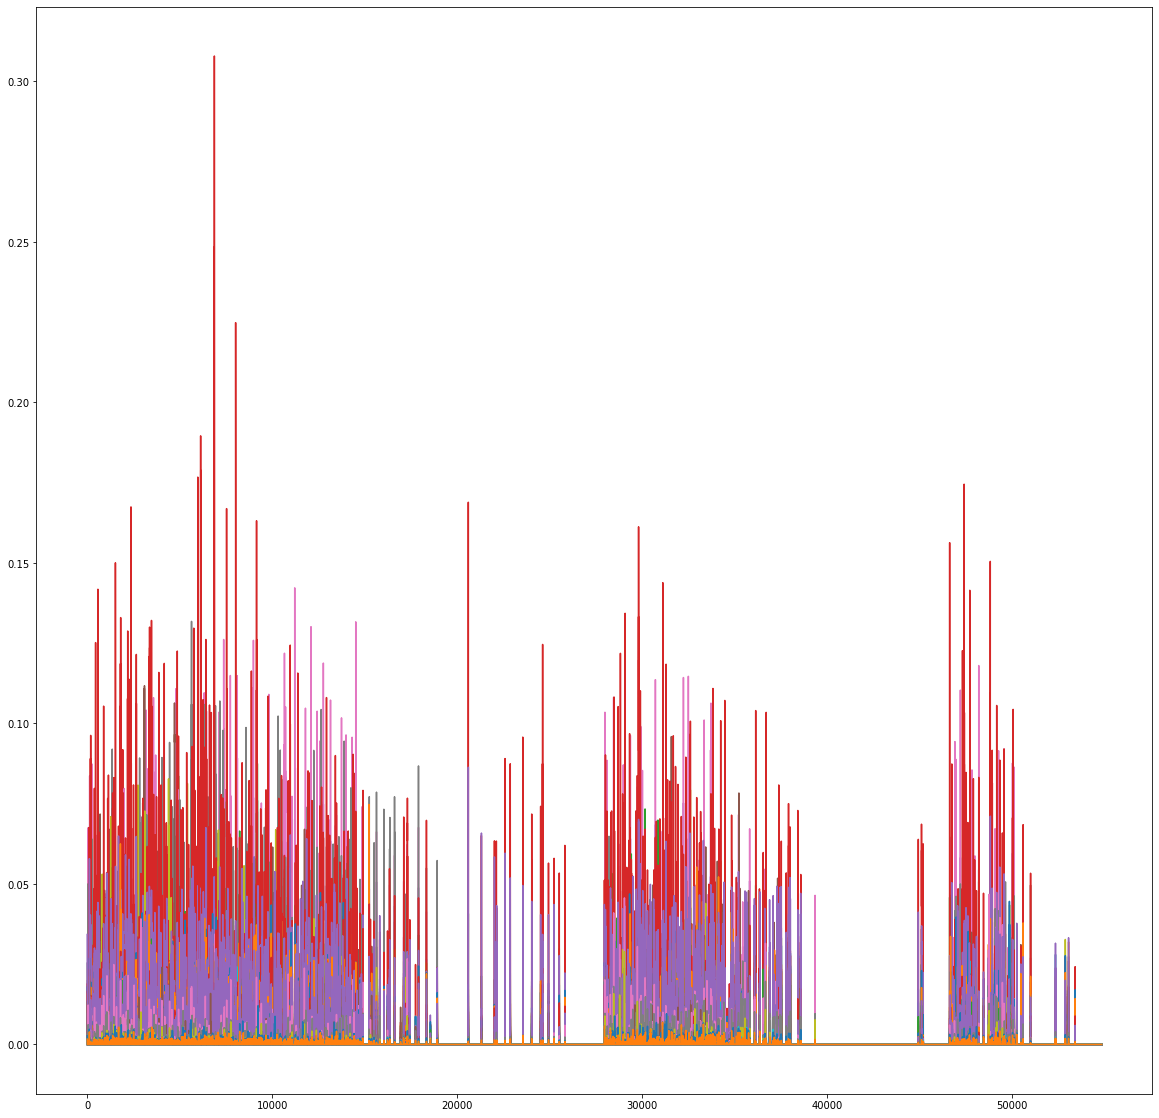

In [12]:
tumors = []

for i in range(0, len(ones)):
    tumors.append(MSI_reshaped[ones[i], :])

plt.figure(figsize = (20, 20))
#plt.plot(tumors)

tumors_nd = np.array(tumors)
print("Size of all tumors with spectra data:", tumors_nd.size)
print("Shape of all tumors with spectra data:", tumors_nd.shape)

plt.plot(tumors_nd)

In [13]:
tumors_nd.shape

(54833, 82)

In [14]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(tumors_nd)

In [ ]:
X_tsne.shape

(54833, 2)

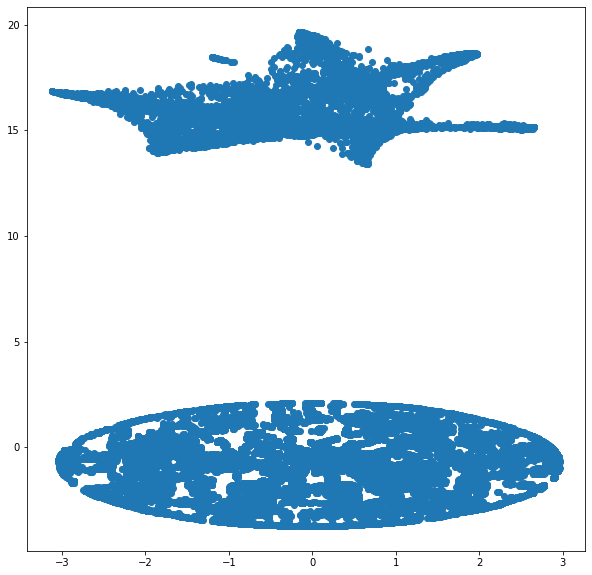

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(X_tsne[:,0],X_tsne[:,1])

In [15]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
g_data['mz_val_mod'] = lb_make.fit_transform(tumors_nd[:, 4])
colors = g_data['mz_val_mod']

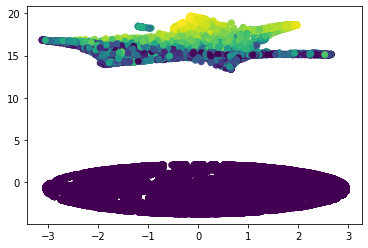

In [ ]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c = colors)

In [16]:
tsne = TSNE(n_components=3)
X_tsne_3 = tsne.fit_transform(tumors_nd)

In [17]:
X_tsne_3.shape

(54833, 3)

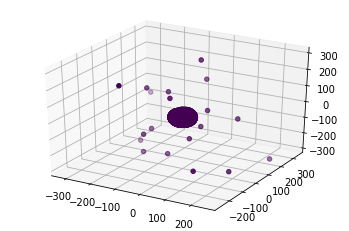

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_tsne_3[:,0],X_tsne_3[:,1],X_tsne_3[:,2],c=colors)
plt.show()